In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.random import random_circuit
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info.operators import Operator

In [2]:
def pretty_print(x):
    with np.printoptions(precision=3, suppress=True):
        print(x)

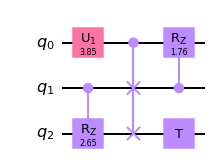

In [3]:
n = 3
circ = random_circuit(n,n)
circ.draw(output='mpl')


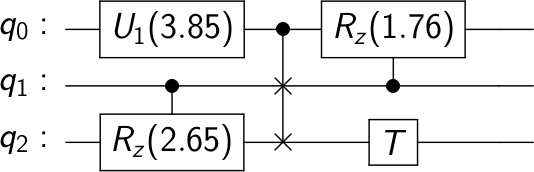

In [4]:
circ.draw(output='latex')

In [5]:
result_statevec_sim = execute(circ, Aer.get_backend('statevector_simulator')).result()
psi = result_statevec_sim.get_statevector(circ, decimals=3)
pretty_print(psi)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


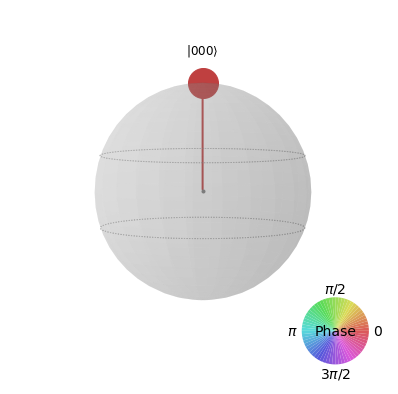

In [6]:
plot_state_qsphere(psi)

In [7]:
result_unitary_sim = execute(circ, Aer.get_backend('unitary_simulator')).result()
U = result_unitary_sim.get_unitary(circ, decimals=3)
pretty_print(U)

[[ 1.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j    -0.76 -0.65j   0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j    -0.592-0.806j  0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.015-1.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.707+0.707j
   0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j    -0.986-0.166j  0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.33 +0.944j  0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.85 +0.527j]]


In [8]:
op = Operator(circ) # implicitly uses unitary simulator
op.dim

(8, 8)

In [9]:
x = np.zeros(2**n)
x[0] = 1
pretty_print(op.data.dot(x))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
